# *Assignment #4*

## **[CSCI 581](https://www.ecst.csuchico.edu/~bjuliano/csci581/)**, Spring 2022

Your Name Goes Here

## Predicting house prices in California

In this exercise, you will be working with the [California housing dataset (regression)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) available from Scikit-learn. The original dataset is from *StatLib* (see http://lib.stat.cmu.edu/datasets/).

This dataset was derived from the 1990 U.S. census, using one row per census
*block group*. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

A *household* is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surpinsingly large values for block groups with few households
and many empty houses, such as vacation resorts.

## Data

The dataset contains 20,640 observations on 9 numeric attributes.
The target attribute is `MedHouseVal`, the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). The other attributes are:

*   `MedInc`: median income in block group
*   `HouseAge`: median house age in block group
*   `AveRooms`: average number of rooms per household
*   `AveBedrms`: average number of bedrooms per household
*   `Population`: block group population
*   `AveOccup`: average number of household members
*   `Latitude`: block group latitude
*   `Longitude`: block group longitude



## Required components of your submission 

Your *Google Colab* Jupyter notebook must include:

1.   all pertinent *exploratory data analysis* (EDA) code, visualizations, and justifications;

    a) Confirm that there is no missing data.

    b) Generate a histogram view of the all the attributes in the dataset using the [`hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) method in `pandas`.

    c) Use the `Latitude` and `Longitude` attributes to visualize the locations associated with high-valued houses. Generate a scatter plot where the x- and y-axis would be the latitude and longitude, and the circle size and color would be linked with the house value in the district. What does the plot tell you?

    d) Use the correlation matrix approach for feature selection and select a subset of the 8 predicting attributes to use for model building.

2.   use of the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) estimator to build a model that will predict the median house value given the predicting attributes you selected

    a) Use the default values for a (multiple) linear regressor just like we did in class.
    
    b) Consider the use of a (multiple) polynomial regressor to improve the performance of your model, if applicable.

3.   all pertinent model diagnostics, including metrics and visualizations; and
4.   your final model equation.

Be sure to check out or review the *Assignments/Projects* section of our [*Blackboard*](https://learn.csuchico.edu/) course page for details regarding expectations, requirements, and the [*Jupyter Notebook Rubric*](https://www.ecst.csuchico.edu/~bjuliano/Teaching/rubric-jupyter-notebook.pdf) that will be used to evaluate Jupyter notebook submissions.



# Solution

Imports Required

In [1]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load the “California housing dataset”. This dataset can be fetched from internet using scikit-learn.

In [2]:
#Load the “California housing dataset”. This dataset can be fetched from internet using scikit-learn.
california_housing = fetch_california_housing(as_frame=True)
#Look at the available description
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
#Let’s have an overview of the entire dataset.
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


As written in the description, the dataset contains aggregated data regarding each district in California. Let’s have a close look at the features that can be used by a predictive model.

In [4]:
#Let's have a close look at the features that can be used by a predictive model
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


This dataset, we have information regarding the demography (income, population, house occupancy) in the districts, the location of the districts (latitude, longitude), and general information regarding the house in the districts (number of rooms, number of bedrooms, age of the house). Since these statistics are at the granularity of the district, they corresponds to averages or medians.

Now, let’s have a look to the target to be predicted.

In [5]:
# Display the values of the target attribute
california_housing.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

The target contains the median of the house value for each district. Therefore, this problem is a regression problem.

We can now check more into details the data types and if the dataset contains any missing value.

In [6]:
#check for missing or null values
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


We can see that:
1. the dataset contains 20,640 samples and 8 features;
2. all features are numerical features encoded as floating number;
3. there is no missing values.


In [21]:
# Search for any possible missing values
california_housing_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
print(california_housing_df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


##### This confirms that there is no missing values in the California Housing Data

Let’s have a quick look at the distribution of these features by plotting their histograms

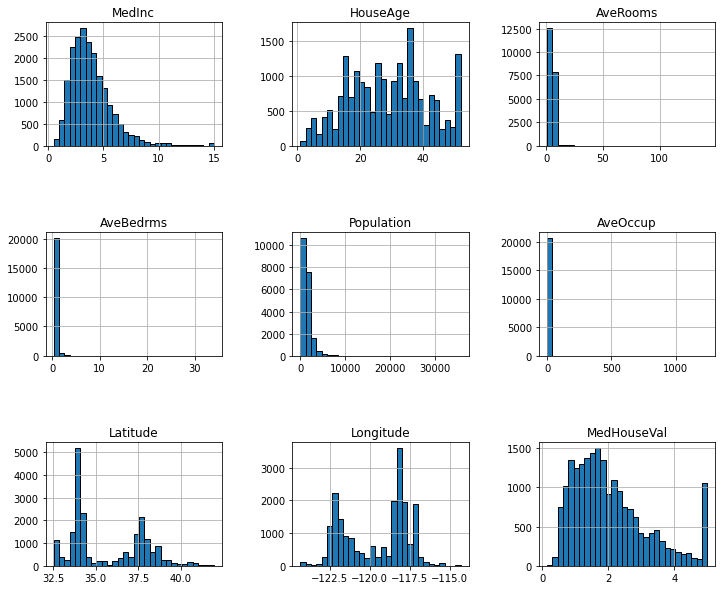

In [7]:
#Plot histogram for California Housing dataset
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

From above graph we can conclude below:

1. Focus on features for which their distributions would be more or less expected.
2. The median income is a distribution has a long tail. It means that the salary of people is more or less normally distributed but there is few people getting a high salary.
3. Regarding the average house age, the distribution is more or less uniform.
4. For high-valued houses: all houses with a price above 5 are given the value 5.
5. Focusing on the other features like average rooms, average bedrooms, average occupation, and population, the range of the data is large with unnoticeable bin for the largest values. It means that there are very high and few values. 


In [8]:
# Specificity looking at the statistics for these features:
features_of_interest = ["AveRooms", "AveBedrms", "AveOccup", "Population"]
california_housing.frame[features_of_interest].describe()

,AveRooms,AveBedrms,AveOccup,Population
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,3.070655,1425.476744
std,2.474173,0.473911,10.386050,1132.462122
min,0.846154,0.333333,0.692308,3.000000
25%,4.440716,1.006079,2.429741,787.000000
50%,5.229129,1.048780,2.818116,1166.000000
75%,6.052381,1.099526,3.282261,1725.000000
max,141.909091,34.066667,1243.333333,35682.000000


For each of these features, comparing the max and 75% values, we can see a huge difference. 
It confirms the intuitions that there are a couple of extreme values.

We discarded the longitude and latitude that carry geographical information. 
The combination of this feature could help us to decide if there are locations associated with high-valued houses. 

Lets make a scatter plot where the x- and y-axis would be the latitude and longitude and the circle size and color would be linked with the house value in the district.

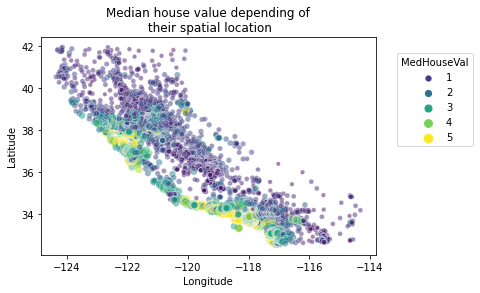

In [9]:
#Scatter plot median house value depending upon their  latitude and longitude 
sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal",bbox_to_anchor=(1.05, 0.95),loc="upper left")
plt.title("Median house value depending of\n their spatial location")
plt.show()

Conclusion from graph:
1. For tate of California, it is interesting to notice that all datapoints show a graphical representation of this state. 
2. We note that the high-valued houses will be located on the coast, where the big cities from California are located: San Diego, Los Angeles, San Jose, or San Francisco.

Lets do a random subsampling to have less data points to plot but that could still allow us to see these specificities.

Text(0.5, 1.0, 'Median house value depending of\n their spatial location')

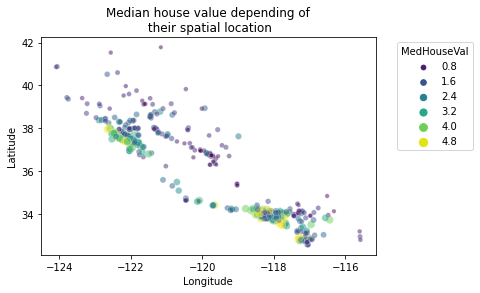

In [10]:
# Lets do a random subsampling to have less data points to plot 
# but that could still allow us to see these specificities.
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(california_housing.frame.shape[0]), size=500,
                     replace=False)
sns.scatterplot(data=california_housing.frame.iloc[indices],
                x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 1),
           loc="upper left")
plt.title("Median house value depending of\n their spatial location")

For the final analysis by making a pair plot of all features and the target but dropping the longitude and latitude. We will quantize the target such that we can create proper histogram.

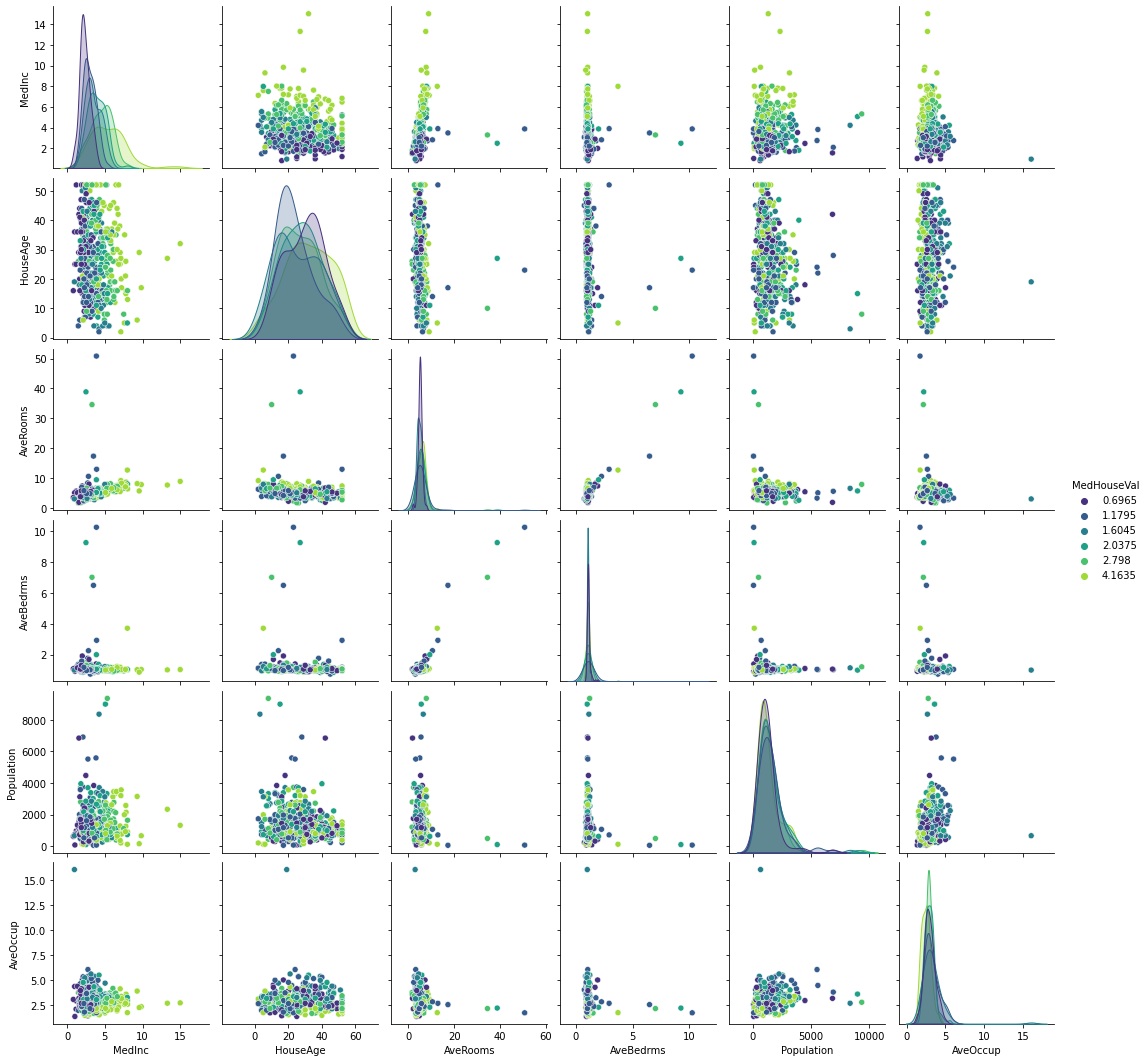

In [11]:
# Drop the unwanted columns
columns_drop = ["Longitude", "Latitude"]
subset = california_housing.frame.iloc[indices].drop(columns=columns_drop)
# Quantize the target and keep the midpoint for each interval
subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)
_ = sns.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

Conclusion from plot:
1. Its always complicated to interpret a pairplot since there is a lot of data, here we can get a couple of intuitions. We can confirm that some features have extreme values. 
2. We can see that the median income is helpful to distinguish high-valued from low-valued houses.
3. Thus, creating a predictive model, we could expect the longitude, latitude, and the median income to be useful features to help at predicting the median house values.

##### Feature Selection

In [12]:
# Compute the pairwise correlation of features/attributes/columns
corr = california_housing_df.corr()
# Print the correlation matrix
print(corr)

              MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
MedInc      1.000000 -0.119034  0.326895  ...  0.018766 -0.079809  -0.015176
HouseAge   -0.119034  1.000000 -0.153277  ...  0.013191  0.011173  -0.108197
AveRooms    0.326895 -0.153277  1.000000  ... -0.004852  0.106389  -0.027540
AveBedrms  -0.062040 -0.077747  0.847621  ... -0.006181  0.069721   0.013344
Population  0.004834 -0.296244 -0.072213  ...  0.069863 -0.108785   0.099773
AveOccup    0.018766  0.013191 -0.004852  ...  1.000000  0.002366   0.002476
Latitude   -0.079809  0.011173  0.106389  ...  0.002366  1.000000  -0.924664
Longitude  -0.015176 -0.108197 -0.027540  ...  0.002476 -0.924664   1.000000

[8 rows x 8 columns]


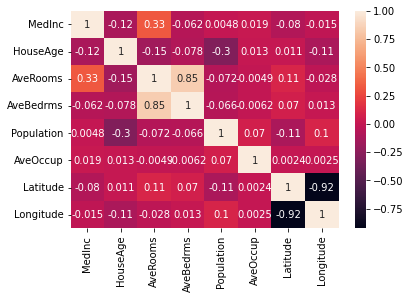

In [13]:
# Plot the correlation matrix
sns.heatmap(corr, annot=True)
plt.show()

In [22]:
#---get the top 8 features that has the highest correlation---
california_housing_df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
california_housing_df['MedHouseVal'] = california_housing.target
print(california_housing_df.corr().abs().nlargest(3, 'MedHouseVal').index) # index shows the row label
print(california_housing_df.corr().abs().nlargest(3, 'MedHouseVal').to_numpy()[:,8])

Index(['MedHouseVal', 'MedInc', 'AveRooms'], dtype='object')
[1.         0.68807521 0.15194829]


Note that from the dataset description

*   `MedInc`: median income in block group
*   `AveRooms`: average number of rooms per household
*   `MedHouseVal`: The target attribute is `MedHouseVal`, the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

####Linear Regression

Plot against 'MedInc' vs 'MedHouseVal'

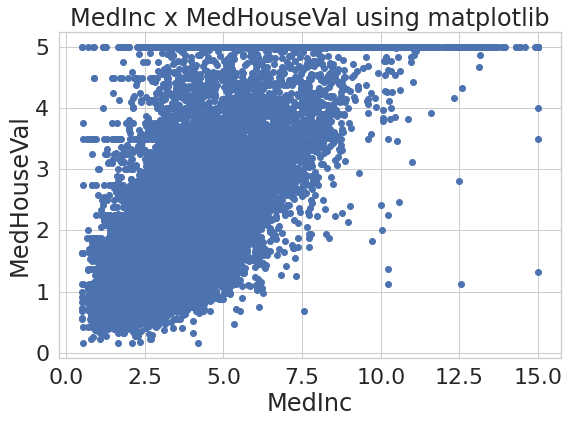

In [48]:
plt.figure(figsize=(9, 6))
plt.scatter(california_housing_df['MedInc'], california_housing_df['MedHouseVal'], marker='o')
plt.title('MedInc x MedHouseVal using matplotlib')
# Median income in block group
plt.xlabel('MedInc')
#  The median house value for California districts (in $1,00000s)
plt.ylabel('MedHouseVal')
plt.show()

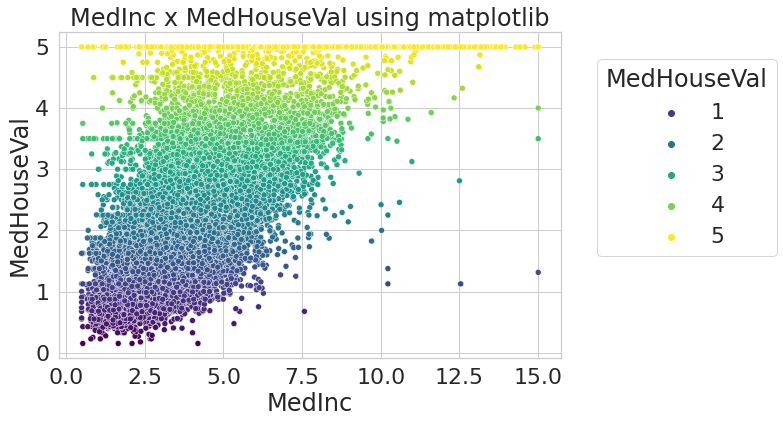

In [41]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
        data=california_housing_df,
        x=california_housing_df['MedInc'],
        y=california_housing_df['MedHouseVal'],
        hue=california_housing_df['MedHouseVal'],
        palette="viridis",
        legend=True
        )
plt.title('MedInc x MedHouseVal using seaborn')
plt.legend(title="MedHouseVal",bbox_to_anchor=(1.05, 0.95),loc="upper left")
# Median income in block group
plt.xlabel('MedInc')
#  The median house value for California districts (in $1,00000s)
plt.ylabel('MedHouseVal')
plt.show()

Plot against 'AveRooms' vs 'MedHouseVal'

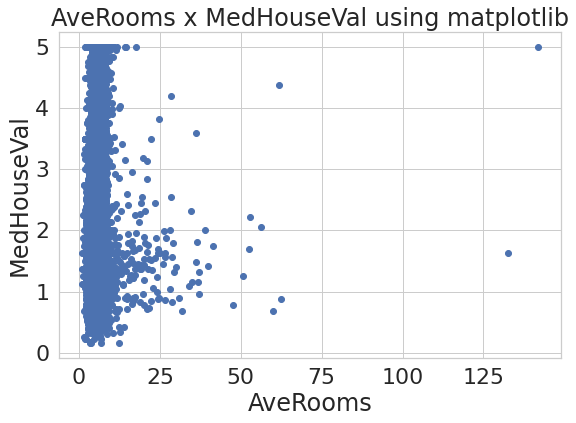

In [49]:
plt.figure(figsize=(9, 6))
plt.scatter(california_housing_df['AveRooms'], california_housing_df['MedHouseVal'], marker='o')
plt.title('AveRooms x MedHouseVal using matplotlib')
# average number of rooms per household
plt.xlabel('AveRooms')
#  The median house value for California districts (in $1,00000s)
plt.ylabel('MedHouseVal')
plt.show()

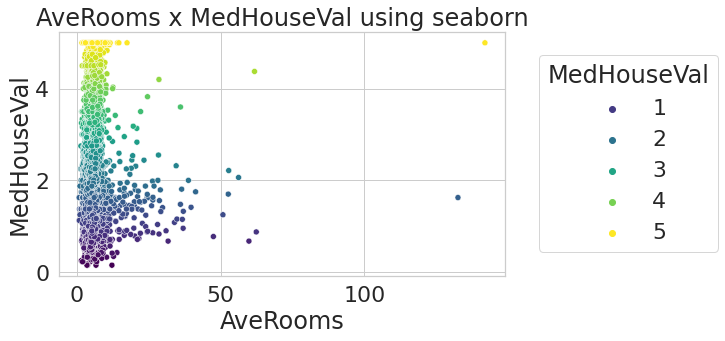

In [50]:
plt.figure(figsize=(8, 4.5))
sns.scatterplot(
        data=california_housing_df,
        x=california_housing_df['AveRooms'],
        y=california_housing_df['MedHouseVal'],
        hue=california_housing_df['MedHouseVal'],
        palette="viridis",
        legend=True
        )
plt.title('AveRooms x MedHouseVal using seaborn')
plt.legend(title="MedHouseVal",bbox_to_anchor=(1.05, 0.95),loc="upper left")
# average number of rooms per household
plt.xlabel('AveRooms')
#  The median house value for California districts (in $1,00000s)
plt.ylabel('MedHouseVal')
plt.show()

#### Training the Model
When dealing with datasets, it is typically a good idea to remove a subset of it, called a holdout set, that can be used for training. This way, we can build models using the remaining data (what remains after removing the holdout set) and the holdout set is used to validate the model. This approach also ensures that the training set (what remains of the dataset after removing the holdout set) and the testing set (the holdout set) do not overlap - we will validate the model based on data it has not seen before.

In the code that follows, we will be using Scikit-learn's train_test_split() function to generate a holdout set for us.

In [51]:
# Concatenate slices to create x values for training
x = pd.DataFrame(np.c_[california_housing_df['MedInc'], california_housing_df['AveRooms']], columns = ['MedInc','AveRooms'])
Y = california_housing_df['MedHouseVal']

In [52]:
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,random_state=5)

In [53]:
print(x_train.shape)
print(Y_train.shape)

(14448, 2)
(14448,)


In [54]:
print(x_test.shape)
print(Y_test.shape)

(6192, 2)
(6192,)


In [55]:
model = LinearRegression()
model.fit(x_train, Y_train)

# Get the parameters for this estimator
params = model.get_params()
print('Model parameters:', params)

Model parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [56]:
price_pred = model.predict(x_test)

print(Y_test) # actual/observed price
print(type(Y_test))

14772    0.936
10105    1.536
20094    1.325
19261    1.479
14139    1.207
         ...  
15291    1.688
1595     4.065
8755     3.788
1294     1.681
7010     1.632
Name: MedHouseVal, Length: 6192, dtype: float64
<class 'pandas.core.series.Series'>


In [57]:
print(price_pred) # predicted price
print(type(price_pred))

[1.61331406 1.98497175 0.284646   ... 2.38633677 2.09999021 2.20964799]
<class 'numpy.ndarray'>


Calculate $R^2$ to determine how well the model performs with the testing set.

In [58]:
print('R-squared: %.4f' % model.score(x_test,Y_test))

R-squared: 0.4924


Calculate the mean squared error (MSE) between actual/observed values and predicted values for price. 

Generate a scatter plot to visualize the differences between these values.

MSE = 0.6919541480004131


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

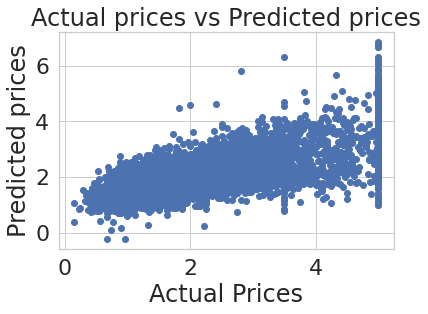

In [59]:
mse = mean_squared_error(Y_test, price_pred)
print('MSE =', mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")

Getting the Intercept and Coefficients

After building a model based on the training set, we can use the model to determine both the *intercept* and the *coefficients*.

In [60]:
print(model.intercept_)
print(model.coef_)

0.5678564663189225
[ 0.43191852 -0.03240486]


We can also use the esitmator's `predict()` method to use the model to predict the house price given a specific value for `MedInc` (2.5) and `AvgRooms` (2) ...

In [62]:
print(model.predict([[2.5,2]]))

[1.58284304]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = 0.3,random_state=5)

# Create a classifier: a linear regression classifier
model = LinearRegression()

# Fit the model with the train data
model.fit(X_train, y_train)

# Predict the value of the price on the test subset
predicted = model.predict(X_test)

# Print model score and first 10 correct value - predicted value
print(f"Model score: {model.score(X_test, y_test)}")

for index, correct_value, prediction in zip(range(1, 11), y_test, predicted):
    print(f"Correct value: {correct_value} - Prediction: {prediction}")


The R‐Squared method lets you know how close the test data fits the regression line. A value of 1.0 means a perfect fit. So, you aim for a value of R‐Squared that is close to 1

In [ ]:
print('R-Squared: %.4f' % model.score(X_test, y_test)) 

Scatter plot showing the actual vs. the predicted value

In [ ]:
#Plot expected value against predicted values
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)

print("mean_squared_error : ",mse)
expected = y_test
df = pd.DataFrame()
df["Expected"] = pd.Series(expected)
df["Predicted"] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(
    data=df, x="Expected", y="Predicted", hue="Predicted", palette="cool",
    legend=False
)

start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)
axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end])
plt.show()


The formula for multiple regression is as follows:
Y = β0 + β1x1 +β2x2..... +β8x8

where Y is the dependent variable, β0 is the intercept, and β1 and β2 are the coefficient of the two features x1 and x2, respectively.

With the model trained, we can obtain the intercept as well as the coefficients of the features:

In [ ]:
print("intercept_",model.intercept_)
print("coef_", model.coef_) 

Polynomial Regression

We saw how to apply linear regression to predict on the california housing. While the result is somewhat acceptable, it is not very accurate. This is because sometimes a linear regression line might not be the best solution to capture the relationships between the features and label accurately. In some cases, a curved line might do better.

The Scikit‐learn library contains a number of classes and functions for solving polynomial regression. The PolynomialFeatures class takes in a number specifying the degree of the polynomial features. In the following code snippet, we are creating a quadratic equation (polynomial function of degree 2):

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
degree = 7
polynomial_features = PolynomialFeatures(degree = degree) 
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseValue'] = california_housing.target

x = pd.DataFrame(np.c_[california_housing.data], columns = california_housing.feature_names)
Y = df['MedHouseValue']


Using this PolynomialFeatures object, you can generate a new feature matrix consisting of all polynomial combinations of the features with a degree of less than or equal to the specified degree:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,random_state=5)
x_train_poly = polynomial_features.fit_transform(X_train)
print(x_train_poly) 

The matrix that you see is generated as above:

The first column is always 1.
The second column is the value of x.
The third column is the value of x2.
This can be verified using the get_feature_names() function



You will now use this generated matrix with the LinearRegression class to train your model:

In [ ]:
#polynomial regression
data = fetch_california_housing()

x = pd.DataFrame(data.data, columns = data.feature_names)
y = pd.DataFrame(data.target, columns = ["MedInc"])

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

poly = PolynomialFeatures(degree = 3) 

xPoly = poly.fit_transform(x)

pol_reg = LinearRegression()
pol_reg.fit(xPoly, y)

predictions = pol_reg.predict(xPoly)
score = pol_reg.score(xPoly, y)

print("Score: ", score)
print("Coefficient: \n", pol_reg.coef_)
print("Mean Squared Error %.2f" % mean_squared_error(y, predictions))
print("R2 Score %.2f" % r2_score(y, predictions))

In [ ]:
#---plot the points---
plt.scatter(x, y, s=10)
 
#---plot the regression line---
plt.plot(x, predictions)
plt.show() 